In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, roc_auc_score, roc_curve
)

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [6]:
print(df.describe(include=["object"]))

        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq

In [7]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
print(df.isnull().sum().sum())

0


In [9]:
print(df.duplicated().sum())

0


In [10]:
print("Unique Values per Column:")
print("--" * 30)
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print("--" * 10)

Unique Values per Column:
------------------------------------------------------------
customerID: 7043 unique values
--------------------
gender: 2 unique values
--------------------
SeniorCitizen: 2 unique values
--------------------
Partner: 2 unique values
--------------------
Dependents: 2 unique values
--------------------
tenure: 73 unique values
--------------------
PhoneService: 2 unique values
--------------------
MultipleLines: 3 unique values
--------------------
InternetService: 3 unique values
--------------------
OnlineSecurity: 3 unique values
--------------------
OnlineBackup: 3 unique values
--------------------
DeviceProtection: 3 unique values
--------------------
TechSupport: 3 unique values
--------------------
StreamingTV: 3 unique values
--------------------
StreamingMovies: 3 unique values
--------------------
Contract: 3 unique values
--------------------
PaperlessBilling: 2 unique values
--------------------
PaymentMethod: 4 unique values
--------------------

In [11]:
print("Checking for unusual values in categorical features:")
print("--" * 30)
for col in df.select_dtypes(include=["object"]).columns:
    print(f"Unique values in '{col}': {df[col].unique()}")
    print("--" * 10)

Checking for unusual values in categorical features:
------------------------------------------------------------
Unique values in 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------
Unique values in 'gender': ['Female' 'Male']
--------------------
Unique values in 'Partner': ['Yes' 'No']
--------------------
Unique values in 'Dependents': ['No' 'Yes']
--------------------
Unique values in 'PhoneService': ['No' 'Yes']
--------------------
Unique values in 'MultipleLines': ['No phone service' 'No' 'Yes']
--------------------
Unique values in 'InternetService': ['DSL' 'Fiber optic' 'No']
--------------------
Unique values in 'OnlineSecurity': ['No' 'Yes' 'No internet service']
--------------------
Unique values in 'OnlineBackup': ['Yes' 'No' 'No internet service']
--------------------
Unique values in 'DeviceProtection': ['No' 'Yes' 'No internet service']
--------------------
Unique values in 'TechSupport': ['No' 'Yes' '

In [12]:
print("Checking for negative values in numerical features:")
for col in df.select_dtypes(include=[np.number]).columns:
    if (df[col] < 0).any():
        print(f"Negative values found in '{col}':")
        print(df[df[col] < 0])
    else:
        print(f"Negative values not found in '{col}'")

Checking for negative values in numerical features:
Negative values not found in 'SeniorCitizen'
Negative values not found in 'tenure'
Negative values not found in 'MonthlyCharges'


In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

C:\Users\amrmu\AppData\Local\Temp\ipykernel_26128\3872007994.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [14]:
df.drop(columns=['customerID'], inplace=True)

In [15]:
df = pd.get_dummies(df, drop_first=True)

In [16]:
print(df.head())

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0       1           29.85         29.85        False   
1              0      34           56.95       1889.50         True   
2              0       2           53.85        108.15         True   
3              0      45           42.30       1840.75         True   
4              0       2           70.70        151.65        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  StreamingTV_Yes  \
0                            True              False  ...            False   
1                           False              False  ...            False   
2                         

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   bool   
 5   Partner_Yes                            7043 non-null   bool   
 6   Dependents_Yes                         7043 non-null   bool   
 7   PhoneService_Yes                       7043 non-null   bool   
 8   MultipleLines_No phone service         7043 non-null   bool   
 9   MultipleLines_Yes                      7043 non-null   bool   
 10  InternetService_Fiber optic            7043 non-null   bool   
 11  Inte

In [18]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2265.000258
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1400.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


C:\Users\amrmu\AppData\Local\Temp\ipykernel_26128\4290950718.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn_Yes', data=df, palette="coolwarm")


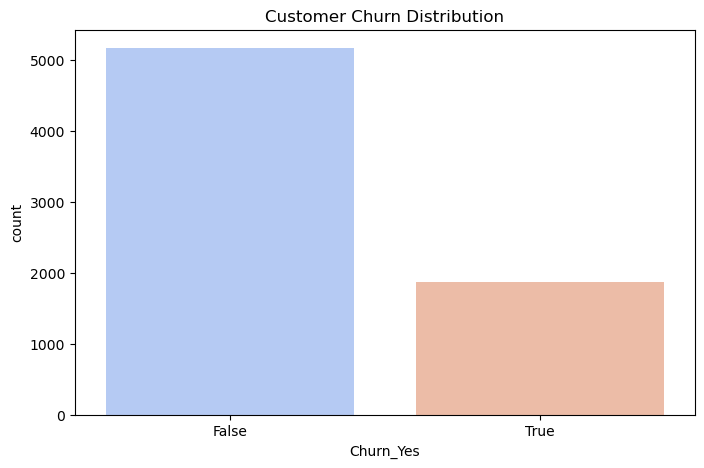

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn_Yes', data=df, palette="coolwarm")
plt.title("Customer Churn Distribution")
plt.show()

In [20]:
X = df.drop("Churn_Yes", axis=1)
y = df["Churn_Yes"]

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [21]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
])

In [22]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Accuracy: 0.7519


In [23]:
param_grid = [
    {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l1'],
        'classifier__solver': ['liblinear', 'saga']
    },
    {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['liblinear', 'saga']
    }
]

In [24]:
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

C:\Users\amrmu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\amrmu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\amrmu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\amrmu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\amrmu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\amrmu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42))]),
             param_grid=[{'classifier__C': [0.01, 0.1, 1, 10, 100],
                          'classifier__penalty': ['l1'],
                          'classifier__solver': ['liblinear', 'saga']},
                         {'classifier__C': [0.01, 0.1, 1, 10, 100],
                          'classifier__penalty': ['l2'],
                          'classifier__solver': ['liblinear', 'saga']}],
             scoring='accuracy')

In [25]:
print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

Best Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}


In [26]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)


print("Model Evaluation Results:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Model Evaluation Results:
MAE: 0.2583
MSE: 0.2583
R² Score: -0.3250
Accuracy: 0.7417
Precision: 0.5087
Recall: 0.7834
F1 Score: 0.6168
ROC-AUC Score: 0.8404


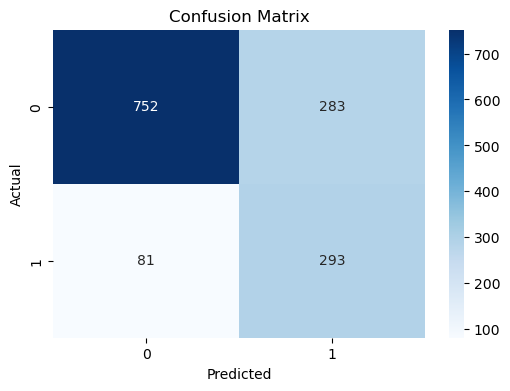

In [28]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

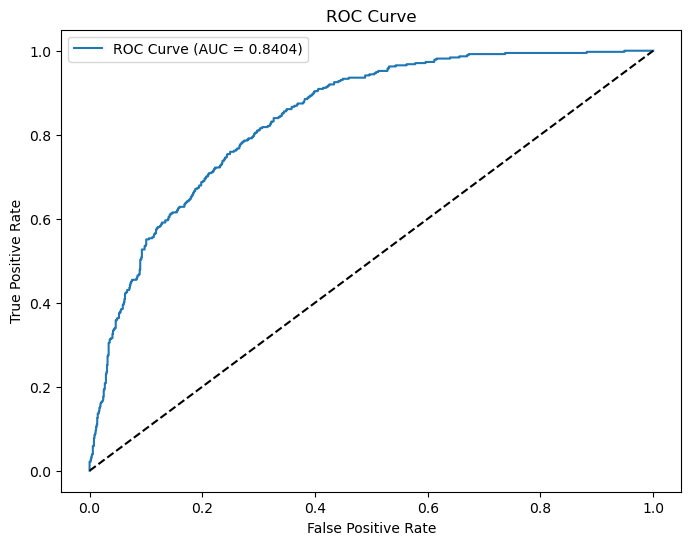

In [29]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

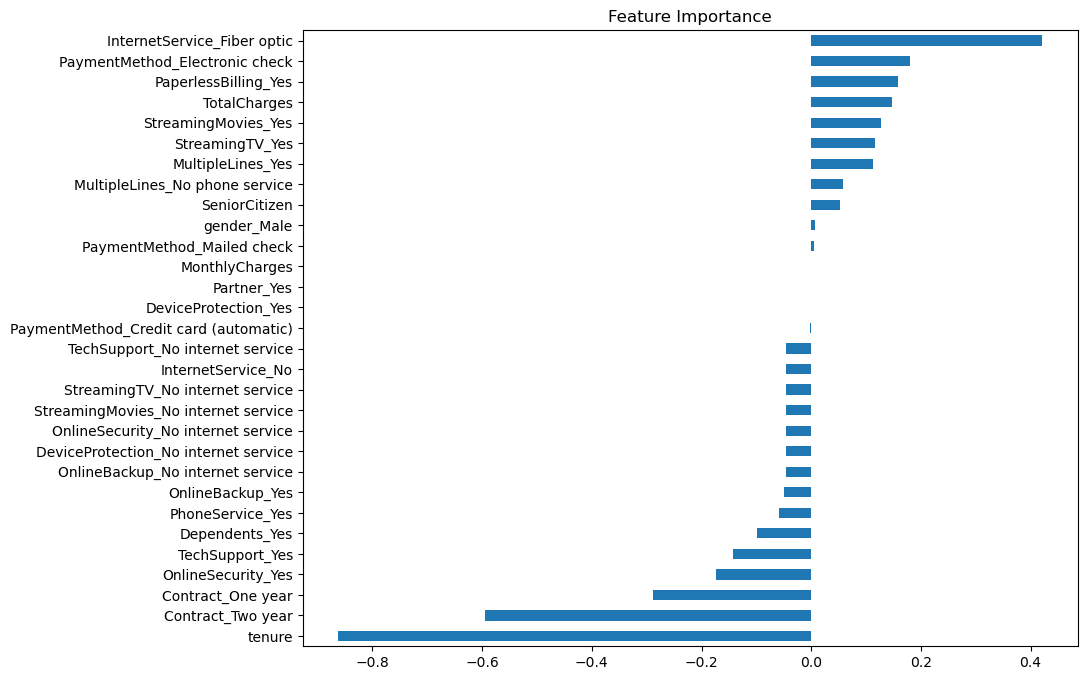

In [30]:
coefficients = best_model.named_steps['classifier'].coef_[0]
feature_importance = pd.Series(coefficients, index=X.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title("Feature Importance")
plt.show()